In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis 
from sklearn.naive_bayes import  GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split




In [3]:
df=pd.read_csv("C:/Users/jivitesh's PC/Desktop/Indian Elections/General Elections/constituency_wise_detailed_results/2014.csv")
#df.head()
df.info()
#df2=df.dropna(axis=0,inplace=True)
#df.info()
df.PARTY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 14 columns):
TERRITORY                  8355 non-null object
CONSTITUENCY               8355 non-null object
CANDIDATE                  8355 non-null object
SEX                        7845 non-null object
AGE                        7845 non-null float64
CATEGORY                   7845 non-null object
PARTY                      8355 non-null object
PARTY SYMBOL               8355 non-null object
GENERALVOTESSECURED        8355 non-null int64
POSTALVOTESSECURED         8355 non-null int64
TOTALVOTESSECURED          8355 non-null int64
PERCENTAGEOFTOTALVOTES     8355 non-null float64
PERCENTAGEOFTOTALPOLLED    8355 non-null float64
TOTALELECTORS              8355 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 913.9+ KB


0              TRS
1              INC
2              TDP
3              BSP
4              IND
5              IND
6              IND
7              IND
8             NOTA
9              TDP
10             BSP
11             TRS
12             INC
13            PPOI
14             RPI
15            BCUF
16             NIP
17            MaSP
18           RP(K)
19             IND
20             IND
21             IND
22             IND
23             IND
24             IND
25             IND
26            NOTA
27             BJP
28             INC
29             NCP
           ...    
8325         AINRC
8326          ADMK
8327           BSP
8328           INC
8329           DMK
8330           CPI
8331         JD(U)
8332    CPI(ML)(L)
8333           SAP
8334          AAAP
8335           IND
8336           IND
8337           IND
8338           IND
8339           IND
8340           IND
8341           IND
8342           IND
8343           IND
8344           IND
8345           IND
8346        

# Fetching Total Votes Gained By Each party 2014

In [4]:
df=pd.read_csv("C:/Users/jivitesh's PC/Desktop/Indian Elections/General Elections/constituency_wise_detailed_results/2014.csv")
#df.head()
#df.info()
#df2=df.dropna(axis=0,inplace=True)
#df.info()
df.PARTY
PartyOrderedNames=[]
PartiesTotalVotes={}
UniquePartyArray=[i for i in set(df.PARTY)]
AllIndexes={}
np.asarray(UniquePartyArray)

for i in UniquePartyArray:
    PartiesTotalVotes[i]=0





for i in range (len(df.PARTY)):
        PartyOrderedNames.append(df.PARTY[i])
np.asarray(PartyOrderedNames)

for i in PartiesTotalVotes.keys():
    AllIndexes[i]=np.where(df.PARTY==i)[0]
    
def SumTotal(target):
    for x in AllIndexes[target]:
        PartiesTotalVotes[target]=PartiesTotalVotes[target]+df.TOTALVOTESSECURED[x]
    return PartiesTotalVotes
         
for i in UniquePartyArray:
    for j in df.PARTY:
        if i==j:
            SumTotal(j)
          

        
        
for i in PartiesTotalVotes.keys():
    PartiesTotalVotes[i]=PartiesTotalVotes[i]/PartyOrderedNames.count(i)

PartiesTotalVotes
CopyOfDict=PartiesTotalVotes.copy()





In [5]:
print(CopyOfDict)

{'KS': 2946.0, 'ABJS': 20902.0, 'RaBaP': 1521.0, 'DaP': 2175.0, 'APM': 372.0, 'RsAD': 12366.0, 'BSDS': 924.0, 'BMSM': 3441.0, 'hkd': 2761.0, 'RVLP': 2958.0, 'RJP(E)': 2654.0, 'RPI': 87952.0, 'NCP': 8635558.0, 'RPI(KH)': 23110.0, 'NRSN': 1725.0, 'MEDP': 10490.0, 'IPGP': 3488.0, 'MaSP': 22022.0, 'NYP': 1176.0, 'MBCOI': 19417.0, 'PRISM': 2694.0, 'ASaP': 1617.0, 'bjdi': 1118.0, 'HiPPa': 8853.0, 'RVP': 2396.0, 'RshJP': 1571.0, 'AIMF': 9938.0, 'BLSP': 1078473.0, 'shsap': 2982.0, 'BCP': 802.0, 'LSP': 165670.0, 'BCUF': 7036.0, 'PPI': 4082.0, 'RaJPa': 217.0, 'RAHM': 13185.0, 'AIMIM': 685730.0, 'BSP': 22434033.0, 'RSMD': 30888.0, 'SJPA': 15474.0, 'TTNC': 474.0, 'IUC': 13527.0, 'Aa S P': 3482.0, 'BJM': 325.0, 'IPP': 2155.0, 'PLP': 1386.0, 'TECPI': 2311.0, 'JaRaPa': 1318.0, 'AKAKRP': 1568.0, 'BSP(K)': 5416.0, 'UPRP': 542.0, 'SSPD': 6681.0, 'RSD': 665.0, 'IBSPK': 1952.0, 'NEP': 2917.0, 'grac': 2906.0, 'RVNP': 8713.0, 'LSWP': 2820.0, 'SBSP': 118947.0, 'JHAP': 12240.0, 'SSAD': 6788.0, 'BMUP': 763532.

# Getting Top Ten Highest Voted Parties 2014

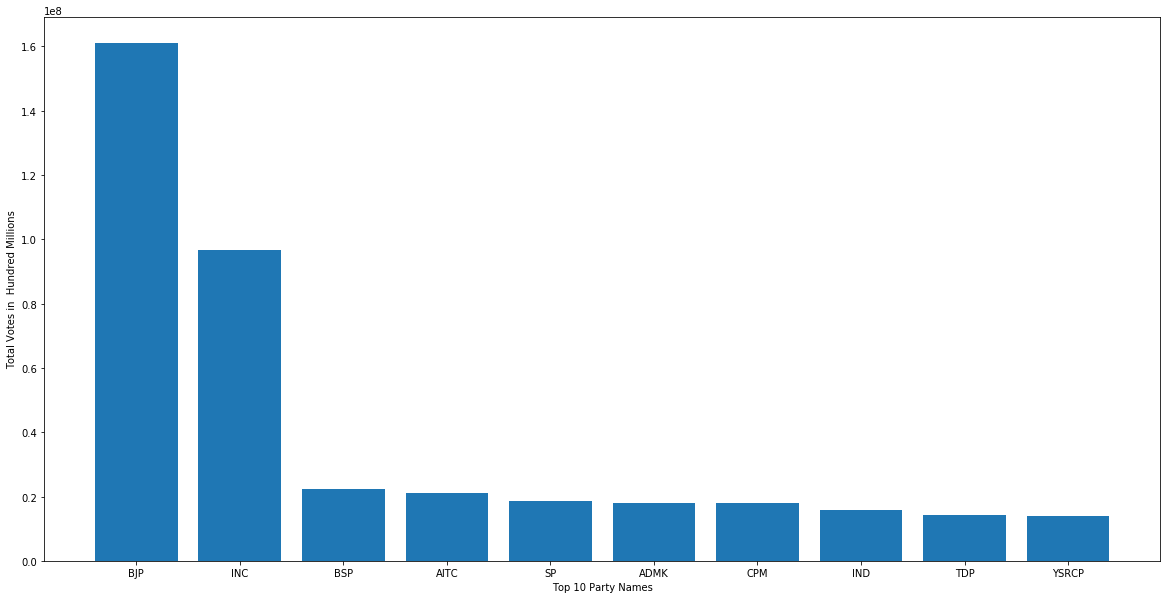

In [6]:
Top_ten=pd.DataFrame({"PartyName":[i for i in CopyOfDict.keys()],"PartyVotes":[i for i in CopyOfDict.values()]})
Top_ten.sort_values(by=["PartyVotes"],ascending=False,inplace=True)
OriginalTopTen=Top_ten.head(10)
Labels=[]
ArrayLabels=(np.asarray(OriginalTopTen.PartyName))
X_axis=np.arange(len(OriginalTopTen.PartyName))



plt.figure(figsize=(20,10))
plt.bar(X_axis,OriginalTopTen.PartyVotes)
plt.xlabel("Top 10 Party Names")
plt.ylabel("Total Votes in  Hundred Millions")
plt.xticks(X_axis,ArrayLabels)
plt.show()




# Fetching Total Votes Gained by  each party 2009

In [7]:
df=pd.read_csv("C:/Users/jivitesh's PC/Desktop/Indian Elections/General Elections/constituency_wise_detailed_results/2009.csv")
#df.head()
#df.info()
#df2=df.dropna(axis=0,inplace=True)
#df.info()
df.PARTY
PartyOrderedNames2009=[]
PartiesTotalVotes2009={}
UniquePartyArray2009=[i for i in set(df.PARTY)]
AllIndexes2009={}
np.asarray(UniquePartyArray2009)

for i in UniquePartyArray2009:
    PartiesTotalVotes2009[i]=0





for i in range (len(df.PARTY)):
        PartyOrderedNames2009.append(df.PARTY[i])
np.asarray(PartyOrderedNames2009)

for i in PartiesTotalVotes2009.keys():
    AllIndexes2009[i]=np.where(df.PARTY==i)[0]
    
def SumTotal(target):
    for x in AllIndexes2009[target]:
        PartiesTotalVotes2009[target]=PartiesTotalVotes2009[target]+df.TOTALVOTES[x]
    return PartiesTotalVotes2009
         
for i in UniquePartyArray2009:
    for j in df.PARTY:
        if i==j:
            SumTotal(j)
          

        
        
for i in PartiesTotalVotes2009.keys():
    PartiesTotalVotes2009[i]=PartiesTotalVotes2009[i]/PartyOrderedNames2009.count(i)

PartiesTotalVotes2009
CopyOfDict2009=PartiesTotalVotes2009.copy()


# Filtering Top Ten Higest voted parties 2009

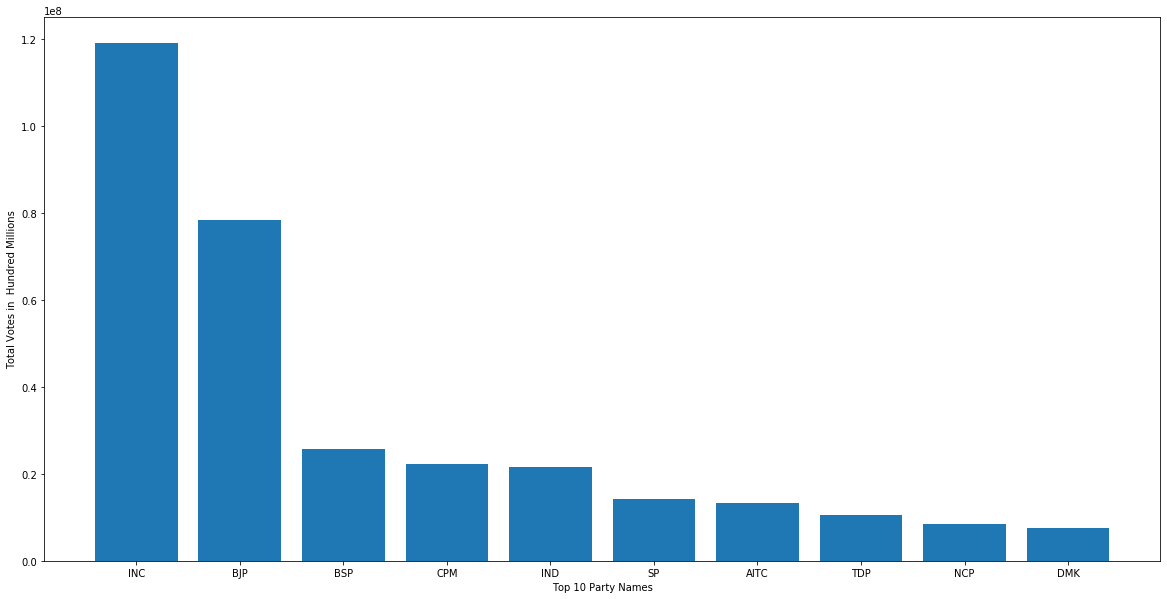

In [8]:
Top_ten2009=pd.DataFrame({"PartyName":[i for i in CopyOfDict2009.keys()],"PartyVotes":[i for i in CopyOfDict2009.values()]})
Top_ten2009.sort_values(by=["PartyVotes"],ascending=False,inplace=True)
OriginalTopTen2009=Top_ten2009.head(10)
Labels2009=[]
ArrayLabels2009=(np.asarray(OriginalTopTen2009.PartyName))
X_axis2009=np.arange(len(OriginalTopTen2009.PartyName))



plt.figure(figsize=(20,10))
plt.bar(X_axis2009,OriginalTopTen2009.PartyVotes)
plt.xlabel("Top 10 Party Names")
plt.ylabel("Total Votes in  Hundred Millions")
plt.xticks(X_axis2009,ArrayLabels2009)
plt.show()

# Fetching total votes gained by each party 2019

In [9]:
df=pd.read_csv("C:/Users/jivitesh's PC/Desktop/Indian Elections/General Elections/VOTING_RESULTS_2019.csv")
#df.head()
#df.info()
#df2=df.dropna(axis=0,inplace=True)
#df.info()
df.PARTY
PartyOrderedNames2019=[]
PartiesTotalVotes2019={}
UniquePartyArray2019=[i for i in set(df.PARTY)]
AllIndexes2019={}
np.asarray(UniquePartyArray2019)

for i in UniquePartyArray2019:
    PartiesTotalVotes2019[i]=0

for i in range (len(df.PARTY)):
        PartyOrderedNames2019.append(df.PARTY[i])
np.asarray(PartyOrderedNames2019)

for i in PartiesTotalVotes2019.keys():
    AllIndexes2019[i]=np.where(df.PARTY==i)[0]
    
def SumTotal(target):
    for x in AllIndexes2019[target]:
        PartiesTotalVotes2019[target]=PartiesTotalVotes2019[target]+df.TOTAL_VOTES[x]
    return PartiesTotalVotes2019
         
for i in UniquePartyArray2019:
    for j in df.PARTY:
        if i==j:
            SumTotal(j)                
        
for i in PartiesTotalVotes2019.keys():
    PartiesTotalVotes2019[i]=PartiesTotalVotes2019[i]/PartyOrderedNames2019.count(i)

PartiesTotalVotes2019
CopyOfDict2019=PartiesTotalVotes2019.copy()


# Filtering top ten parties in 2019

['BJP' 'INC' 'AITC' 'BSP' 'Independent2019' 'YSRCP' 'SP' 'DMK' 'Shivsena'
 'TDP']


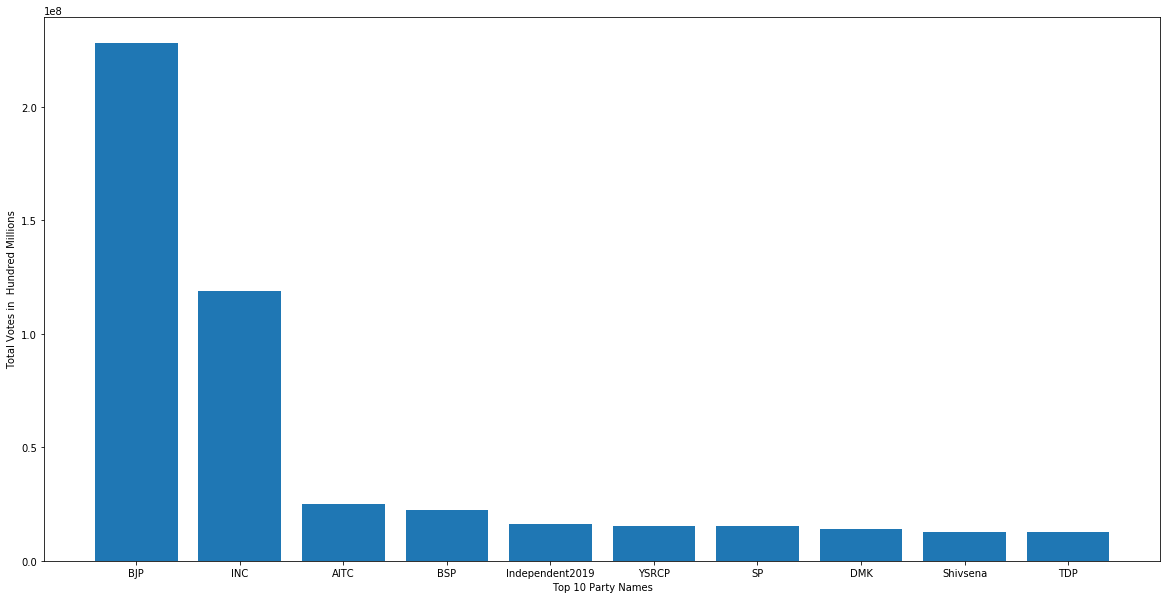

In [10]:
Top_ten2019=pd.DataFrame({"PartyName":[i for i in CopyOfDict2019.keys()],"PartyVotes":[i for i in CopyOfDict2019.values()]})
Top_ten2019.sort_values(by=["PartyVotes"],ascending=False,inplace=True)
OriginalTopTen2019=Top_ten2019.head(10)
Labels2019=[]
ArrayLabels2019=(np.asarray(OriginalTopTen2019.PartyName))
X_axis2019=np.arange(len(OriginalTopTen2019.PartyName))
print(ArrayLabels2019)


plt.figure(figsize=(20,10))
plt.bar(X_axis2019,OriginalTopTen2019.PartyVotes)
plt.xlabel("Top 10 Party Names")
plt.ylabel("Total Votes in  Hundred Millions")
plt.xticks(X_axis2019,ArrayLabels2019)
plt.show()

# Yearly Graphs For Party 2009,2014,2019

{'BJP': [], 'INC': [], 'BSP': [], 'AITC': [], 'SP': [], 'ADMK': [], 'CPM': [], 'IND': [], 'TDP': [], 'YSRCP': [], 'NCP': [], 'DMK': [], 'Independent2019': [], 'Shivsena': []}
{'BJP': [78435381.0, 161047761.0, 228011290.0], 'INC': [119111019.0, 96641749.0, 118787724.0], 'BSP': [25728920.0, 22434033.0, 22290771.0], 'AITC': [13356510.0, 21215661.0, 24929325.0], 'SP': [14284638.0, 18632568.0, 15261257.0], 'ADMK': [6953591.0, 18111579.0, 0], 'CPM': [22219111.0, 17938138.0, 0], 'IND': [21647686.0, 15888094.0, 0], 'TDP': [10481659.0, 14099230.0, 12513061.0], 'YSRCP': [0, 13995435.0, 15534558.0], 'NCP': [8521502.0, 8635558.0, 0], 'DMK': [7625397.0, 9631246.0, 13877622.0], 'Independent2019': [0, 0, 16273403.0], 'Shivsena': [0, 0, 12852822.0]}


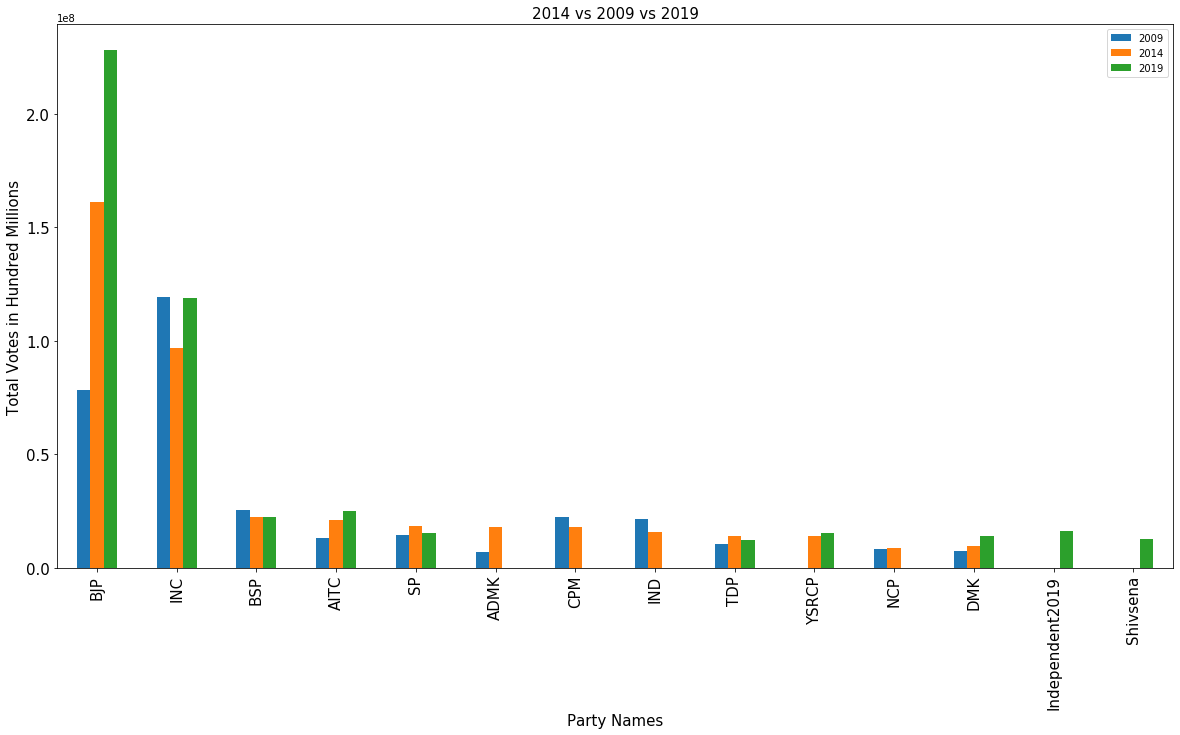

In [75]:
AllPartyNames={}

for i in ArrayLabels:
    AllPartyNames[i]=[]

for i in ArrayLabels2009:
    AllPartyNames[i]=[]

for i in ArrayLabels2019:
    AllPartyNames[i]=[]
    


print(AllPartyNames)

for i in AllPartyNames.keys():
    if i in CopyOfDict2009:
        AllPartyNames[i].append(CopyOfDict2009[i])
        
    elif i not in CopyOfDict2009:
        
        AllPartyNames[i].append(0)
        
    if i in CopyOfDict:
        AllPartyNames[i].append(CopyOfDict[i])
        
    elif i not in CopyOfDict:
        AllPartyNames[i].append(0)  
        
    if i in CopyOfDict2019:
        AllPartyNames[i].append(CopyOfDict2019[i])
        
    elif i not in CopyOfDict2019:
        AllPartyNames[i].append(0)
    
    
    else:
        AllPartyNames[i].append(0)
print(AllPartyNames)

df=pd.DataFrame(AllPartyNames)
df=df.T


df.rename(columns={0:"2009",1:"2014",2:"2019"},inplace=True)
df['ind']=list(df.index)


MyPlot=df.plot(x='ind',y=["2009","2014","2019"],kind="bar",figsize=(20,10),title="2014 vs 2009 vs 2019",fontsize=15)
MyPlot.set_xlabel("Party Names")
MyPlot.set_ylabel("Total Votes in Hundred Millions")


for i in ([MyPlot.xaxis.label,MyPlot.yaxis.label,MyPlot.title]):
    i.set_fontsize(15)

plt.show()



In [68]:
MyPlot=df.plot(x=list(df.index),y=,kind="bar",figsize=(20,10),title="2014 vs 2009 vs 2019",fontsize=15)
MyPlot.set_xlabel("Party Names")
MyPlot.set_ylabel("Total Votes in Hundred Millions")


for i in ([MyPlot.xaxis.label,MyPlot.yaxis.label,MyPlot.title]):
    i.set_fontsize(15)

plt.show()

AttributeError: 'DataFrame' object has no attribute 'column'

# Model Creation and Prediction for 2014

23243.61460172376


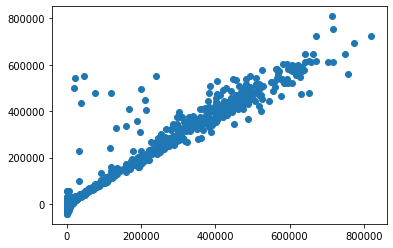

In [56]:

Mse_Scores=[]
Rmse_Scores=[]

    
df=pd.read_csv("C:/Users/jivitesh's PC/Desktop/Indian Elections/General Elections/constituency_wise_detailed_results/2014.csv")
Predictiondf=pd.DataFrame({"GENERALVOTESSECURED":np.asarray(df.GENERALVOTESSECURED),"POSTALVOTESSECURED":np.asarray(df.POSTALVOTESSECURED),"PERCENTAGETOTALVOTES":np.asarray(df.PERCENTAGEOFTOTALVOTES),"PERCENTAGEOFTOTALPOLLED":np.asarray(df.PERCENTAGEOFTOTALPOLLED),"TOTALELECTORS":np.asarray(df.TOTALELECTORS),"TOTALVOTESSECURED":np.asarray(df.TOTALVOTESSECURED)})
Predictiondf.corr()
Predictiondf.columns

X=Predictiondf[['PERCENTAGEOFTOTALPOLLED',
        'POSTALVOTESSECURED', 'TOTALELECTORS','PERCENTAGETOTALVOTES']]
#X=Predictiondf[[
#        'POSTALVOTESSECURED','PERCENTAGETOTALVOTES']]

y=Predictiondf['TOTALVOTESSECURED']

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=5)

lr=LinearRegression()
cv_results=sklearn.model_selection.cross_val_score(lr,X_train,Y_train,cv=10,scoring="neg_mean_squared_error")
Mse_Scores=-cv_results
Rmse_Scores=np.sqrt(Mse_Scores)

lr.fit(X_train,Y_train)
lr.intercept_
CoeffDf=pd.DataFrame(lr.coef_,X.columns,columns=['Coeff'])
CoeffDf
print(Rmse_Scores.mean())

Predictions=lr.predict(X_test)
#print(Predictions)
#print(Y_test)
#print(Y_test-Predictions)
#(Predictiondf.corr())
plt.scatter(Y_test,Predictions)
plt.show()

# Model Creation and Prediction for 2019

35111.59903090917


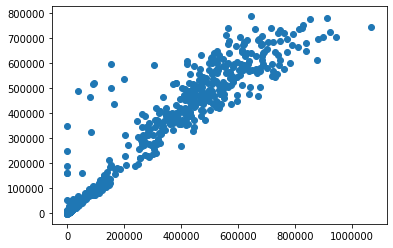

In [57]:

Mse_Scores=[]
Rmse_Scores=[]

    
df=pd.read_csv("C:/Users/jivitesh's PC/Desktop/Indian Elections/General Elections/VOTING_RESULTS_2019.csv")
Predictiondf=pd.DataFrame({"EVMVOTES":np.asarray(df.EVM_VOTES),"POSTALVOTES":np.asarray(df.POSTALVOTES),"VOTINGPERCENTAGE":np.asarray(df.VOTING_PERCENTAGE),"TOTALVOTES":np.asarray(df.TOTAL_VOTES)})
#print(Predictiondf.corr())
Predictiondf.columns

X=Predictiondf[[
         'POSTALVOTES','VOTINGPERCENTAGE']]

y=Predictiondf['TOTALVOTES']

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=8)

lr=LinearRegression()
cv_results=model_selection.cross_val_score(lr,X_train,Y_train,cv=10,scoring="neg_mean_squared_error")
Mse_Scores=-cv_results
Rmse_Scores=np.sqrt(Mse_Scores)

lr.fit(X_train,Y_train)
lr.intercept_
CoeffDf=pd.DataFrame(lr.coef_,X.columns,columns=['Coeff'])
CoeffDf
print(Rmse_Scores.mean())

Predictions=lr.predict(X_test)
#print(Predictions)
#print(Y_test)
#print(Y_test-Predictions)
#(Predictiondf.corr())
plt.scatter(Y_test,Predictions)
plt.show()

In [66]:

Mse_Scores=[]
Rmse_Scores=[]

    
df=pd.read_csv("C:/Users/jivitesh's PC/Desktop/Indian Elections/General Elections/constituency_wise_detailed_results/2009.csv")
print(df.columns)

Predictiondf=pd.DataFrame({"GENERALVOTESSECURED":np.asarray(df.GENERALVOTES),"POSTALVOTESSECURED":np.asarray(df.POSTALVOTES),"PERCENTAGETOTALVOTES":np.asarray(df.PERCENTAGEOFTOTALVOTES),"PERCENTAGEOFTOTALPOLLED":np.asarray(df.PERCENTAGEOFVOTESPOLLED),"TOTALELECTORS":np.asarray(df.TOTALELECTORS),"TOTALVOTESSECURED":np.asarray(df.TOTALVOTES)})
Predictiondf.corr()
Predictiondf.columns

X=Predictiondf[['PERCENTAGEOFTOTALPOLLED',
        'POSTALVOTESSECURED', 'TOTALELECTORS','PERCENTAGETOTALVOTES']]

y=Predictiondf['TOTALVOTESSECURED']

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=5)

lr=LinearRegression()
cv_results=model_selection.cross_val_score(lr,X_train,Y_train,cv=10,scoring="neg_mean_squared_error")
Mse_Scores=-cv_results
Rmse_Scores=np.sqrt(Mse_Scores)

lr.fit(X_train,Y_train)
lr.intercept_
CoeffDf=pd.DataFrame(lr.coef_,X.columns,columns=['Coeff'])
CoeffDf
print(Rmse_Scores.mean())

Predictions=lr.predict(X_test)
#print(Predictions)
#print(Y_test)
#print(Y_test-Predictions)
#(Predictiondf.corr())
plt.scatter(Y_test,Predictions)
plt.show()

Index(['PERCENTAGEOFTOTALVOTES', ' PERCENTAGEOFVOTESPOLLED', 'AGE',
       'CANDIDATE', 'CATEGORY', 'GENERALVOTES', 'PARTY', 'POSTALVOTES', 'SEX',
       'SL NO', 'TOTALVOTES', 'CONSTITUENCY', 'STATE', 'TOTALELECTORS',
       'TOTAL GENERAL VOTES POLLED', 'TOTAL VOTES POLLED',
       'TOTAL POSTAL VOTES POLLED'],
      dtype='object')


AttributeError: 'DataFrame' object has no attribute 'PERCENTAGEOFVOTESPOLLED'

# Model Creation and Prediction for Merged Datasets 2009 and 2014

25981.40210661536


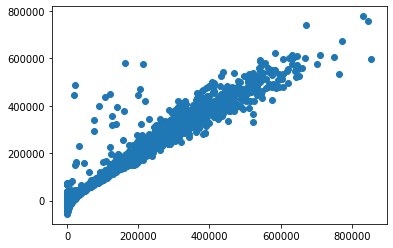

In [61]:

Mse_Scores=[]
Rmse_Scores=[]

    
df=pd.read_csv("C:/Users/jivitesh's PC/Desktop/Indian Elections/General Elections/constituency_wise_detailed_results/2009And2014.csv")
Predictiondf=pd.DataFrame({"POSTALVOTESSECURED":np.asarray(df.POSTALVOTESSECURED),"PERCENTAGETOTALVOTES":np.asarray(df.PERCENTAGEOFTOTALVOTES),"PERCENTAGEOFTOTALPOLLED":np.asarray(df.PERCENTAGEOFTOTALPOLLED),"TOTALELECTORS":np.asarray(df.TOTALELECTORS),"TOTALVOTESSECURED":np.asarray(df.TOTALVOTESSECURED)})
Predictiondf.corr()
Predictiondf.columns

X=Predictiondf[['PERCENTAGEOFTOTALPOLLED',
        'POSTALVOTESSECURED', 'TOTALELECTORS','PERCENTAGETOTALVOTES']]
#X=Predictiondf[[
#        'POSTALVOTESSECURED','PERCENTAGETOTALVOTES']]

y=Predictiondf['TOTALVOTESSECURED']

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=8)

lr=LinearRegression()
cv_results=model_selection.cross_val_score(lr,X_train,Y_train,cv=10,scoring="neg_mean_squared_error")
Mse_Scores=-cv_results
Rmse_Scores=np.sqrt(Mse_Scores)

lr.fit(X_train,Y_train)
lr.intercept_
CoeffDf=pd.DataFrame(lr.coef_,X.columns,columns=['Coeff'])
CoeffDf
print(Rmse_Scores.mean())

Predictions=lr.predict(X_test)
#print(Predictions)
#print(Y_test)
#print(Y_test-Predictions)
#(Predictiondf.corr())
plt.scatter(Y_test,Predictions)
plt.show()

# Model Creation and Prediction for merged Dataset 2009,2014 and 2019

35740.560211573444


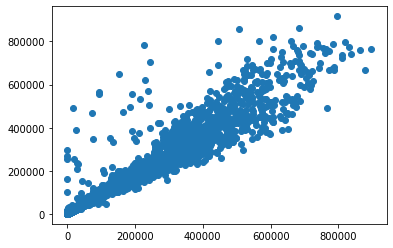

In [62]:

Mse_Scores=[]
Rmse_Scores=[]

    
df=pd.read_csv("C:/Users/jivitesh's PC/Desktop/Indian Elections/General Elections/constituency_wise_detailed_results/2019Specialised.csv")
Predictiondf=pd.DataFrame({"POSTALVOTESSECURED":np.asarray(df.POSTALVOTESSECURED),"PERCENTAGETOTALVOTES":np.asarray(df.PERCENTAGEOFTOTALVOTES),"TOTALVOTESSECURED":np.asarray(df.TOTALVOTESSECURED)})
Predictiondf.corr()
Predictiondf.columns

X=Predictiondf[[
        'POSTALVOTESSECURED','PERCENTAGETOTALVOTES']]
#X=Predictiondf[[
#        'POSTALVOTESSECURED','PERCENTAGETOTALVOTES']]

y=Predictiondf['TOTALVOTESSECURED']

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=9)

lr=LinearRegression()
cv_results=model_selection.cross_val_score(lr,X_train,Y_train,cv=10,scoring="neg_mean_squared_error")
Mse_Scores=-cv_results
Rmse_Scores=np.sqrt(Mse_Scores)

lr.fit(X_train,Y_train)
lr.intercept_
CoeffDf=pd.DataFrame(lr.coef_,X.columns,columns=['Coeff'])
CoeffDf
print(Rmse_Scores.mean())

Predictions=lr.predict(X_test)
#print(Predictions)
#print(Y_test)
#print(Y_test-Predictions)
#(Predictiondf.corr())
plt.scatter(Y_test,Predictions)
plt.show()

In [66]:
df=pd.read_csv("C:/Users/jivitesh's PC/Desktop/Indian Elections/General Elections/constituency_wise_detailed_results/2009.csv")
df

,PERCENTAGEOFTOTALVOTES,PERCENTAGEOFVOTESPOLLED,AGE,CANDIDATE,CATEGORY,GENERALVOTES,PARTY,POSTALVOTES,SEX,SL NO,TOTALVOTES,CONSTITUENCY,STATE,TOTALELECTORS,TOTAL GENERAL VOTES POLLED,TOTAL VOTES POLLED,TOTAL POSTAL VOTES POLLED
0,5.12,6.71,55,ADE TUKARAM,ST,57856,BJP,75,M,1,57931,Adilabad,Andhra Pradesh,1131211,863330,863581,251
1,22.74,29.78,39,KOTNAK RAMESH,ST,257137,INC,44,M,2,257181,Adilabad,Andhra Pradesh,1131211,863330,863581,251
2,32.91,43.11,43,RATHOD RAMESH,ST,372154,TDP,114,M,3,372268,Adilabad,Andhra Pradesh,1131211,863330,863581,251
3,1.46,1.91,50,RATHOD SADASHIV NAIK,ST,16471,BSP,0,M,4,16471,Adilabad,Andhra Pradesh,1131211,863330,863581,251
4,9.98,13.08,59,MESRAM NAGO RAO,ST,112914,PRAP,16,M,5,112930,Adilabad,Andhra Pradesh,1131211,863330,863581,251
5,0.69,0.91,47,ATHRAM LAXMAN RAO,ST,7824,IND,0,M,6,7824,Adilabad,Andhra Pradesh,1131211,863330,863581,251
6,1.18,1.55,36,GANTA PENTANNA,ST,13377,IND,1,M,7,13378,Adilabad,Andhra Pradesh,1131211,863330,863581,251
7,0.81,1.06,39,NETHAVAT RAMDAS,ST,9157,IND,0,M,8,9157,Adilabad,Andhra Pradesh,1131211,863330,863581,251
8,1.45,1.90,55,BANKA SAHADEVU,ST,16440,IND,1,M,9,16441,Adilabad,Andhra Pradesh,1131211,863330,863581,251
9,1.21,1.75,49,GAJJELA SWAMY,SC,15852,BSP,7,M,1,15859,Peddapalle,Andhra Pradesh,1315642,902737,904084,1347


In [57]:
data=[['Anav','Jivi',20],['Jivi','Anav',15],['Utsav','Utsav',15],['Etaash','Anav',10],['Viraat','Viraat',30],['Rohit','Rohit',40],['Yash','Yash',15],['NA','Yash',50],['NA','Anav',123],['NA','Jivi',10],['NA','Etaash',15],['NA','Jivi',10],['Jivi','NA',15],['Anav','Jivi',20],['Jivi','Anav',15],['Utsav','Utsav',15],['Etaash','Anav',10],['Viraat','Viraat',30],['Rohit','Rohit',40],['Yash','Yash',15],['NA','Yash',50],['NA','Anav',123],['NA','Jivi',10],['NA','Etaash',15],['NA','Jivi',10],['Jivi','NA',15]]
df=pd.DataFrame(data,columns=['UniqueName','OrderedName','Total'])



UniqueNameArray=[i for i in (df.UniqueName)]
OrderedNames=[]
NameTotal={}
AllIndexes={}
UniqueNameArray=set(UniqueNameArray)

np.asarray(UniqueNameArray)
for i in UniqueNameArray:
    NameTotal[i]=0
    
for i in range (len(df.OrderedName)):
        OrderedNames.append(df.OrderedName[i])
np.asarray(OrderedNames)

print(df)
#print(OrderedNames)
#print(UniqueNameArray)
#print(NameTotal)
#print(AllIndexes)
UniqueNameArray=set(UniqueNameArray)

#print(NameTotal)

#print(AllIndexes)

UniqueNameArray=list(UniqueNameArray)
print(UniqueNameArray)
   
for i in NameTotal.keys():
    AllIndexes[i]=np.where(df.OrderedName==i)[0]

#print(AllIndexes)

def SumTotal(target):
    for x in AllIndexes[target]:
        NameTotal[target]=NameTotal[target]+df.Total[x]
    return NameTotal

for i in range(len(UniqueNameArray)-1):
    for j in df.OrderedName:
        if UniqueNameArray[i]==j :
            SumTotal(j)

for i in NameTotal.keys():
    NameTotal[i]=NameTotal[i]/OrderedNames.count(i)
        
print(NameTotal)
        
Copy=NameTotal[:]

            
           
       
            
 


   UniqueName OrderedName  Total
0        Anav        Jivi     20
1        Jivi        Anav     15
2       Utsav       Utsav     15
3      Etaash        Anav     10
4      Viraat      Viraat     30
5       Rohit       Rohit     40
6        Yash        Yash     15
7          NA        Yash     50
8          NA        Anav    123
9          NA        Jivi     10
10         NA      Etaash     15
11         NA        Jivi     10
12       Jivi          NA     15
13       Anav        Jivi     20
14       Jivi        Anav     15
15      Utsav       Utsav     15
16     Etaash        Anav     10
17     Viraat      Viraat     30
18      Rohit       Rohit     40
19       Yash        Yash     15
20         NA        Yash     50
21         NA        Anav    123
22         NA        Jivi     10
23         NA      Etaash     15
24         NA        Jivi     10
25       Jivi          NA     15
['Jivi', 'Viraat', 'Utsav', 'NA', 'Etaash', 'Anav', 'Yash', 'Rohit']
{'Jivi': 80.0, 'NA': 30.0, 'Viraat': 60.

TypeError: unhashable type: 'slice'